<a href="https://colab.research.google.com/github/wang201156/CFD_program/blob/main/Transient_Two_Dimensional_Heat_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step: 1, Time: 0.00156, Residual: 9.31e-06
Step: 2, Time: 0.00313, Residual: 8.23e-06
Step: 3, Time: 0.00469, Residual: 7.34e-06
Step: 4, Time: 0.00625, Residual: 8.70e-06
Step: 5, Time: 0.00781, Residual: 7.92e-06
Step: 6, Time: 0.00938, Residual: 7.11e-06
Step: 7, Time: 0.01094, Residual: 9.26e-06
Step: 8, Time: 0.01250, Residual: 8.55e-06
Step: 9, Time: 0.01406, Residual: 7.98e-06
Step: 10, Time: 0.01563, Residual: 7.47e-06
Step: 11, Time: 0.01719, Residual: 9.92e-06
Step: 12, Time: 0.01875, Residual: 9.36e-06
Step: 13, Time: 0.02031, Residual: 8.88e-06
Step: 14, Time: 0.02188, Residual: 8.43e-06
Step: 15, Time: 0.02344, Residual: 8.03e-06
Step: 16, Time: 0.02500, Residual: 7.66e-06
Step: 17, Time: 0.02656, Residual: 7.32e-06
Step: 18, Time: 0.02813, Residual: 9.86e-06
Step: 19, Time: 0.02969, Residual: 9.44e-06
Step: 20, Time: 0.03125, Residual: 9.06e-06
Step: 21, Time: 0.03281, Residual: 8.70e-06
Step: 22, Time: 0.03438, Residual: 8.36e-06
Step: 23, Time: 0.03594, Residual: 8.03e-

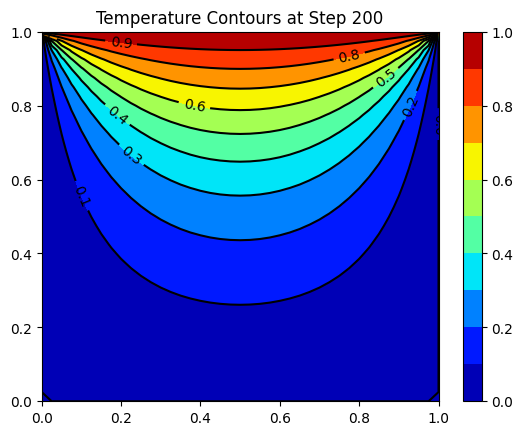

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 設定網格參數
nx, ny = 41, 41
xmax, xmin = 1.0, 0.0
ymax, ymin = 1.0, 0.0
tol = 1e-5
max_steps = 200
pi = np.pi
alpha=1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)
d_time = 0.5/(dx**-2 + dy**-2)/alpha *10

# 初始化矩陣
T =  np.zeros((nx, ny))
T_old = np.zeros((nx, ny))
RHS=np.zeros((nx, ny))

# 設定邊界條件
T[-1, :] = 0   # 底部邊界 T = 0
T[0, :] = 0  # 頂部邊界 T = 0
T[:, 0] = 0   # 左側邊界 T = 0
T[:, -1] = 1  # 右側邊界 T = 1
#=======================================================================================
# 2. the contour of T = 0.5
save_steps = [1, 2, 3, 5, 10, 20, 40, 80, 120, 160, 200]
saved_fields = {}
#=======================================================================================
# 迭代求解
dT = []
RHS=np.zeros((nx, ny))

max_grad_list = [] #4. Maximum temperature gradient in the domain.

aw = alpha*d_time / (2 * dx**2)
ae = alpha*d_time / (2 * dx**2)
as_ = alpha*d_time / (2 * dy**2)
an = alpha*d_time / (2 * dy**2)
ap = 1+ alpha*d_time/(dx**2) + alpha*d_time/(dy**2)   ##  ap=1+aw+ae+as+an

for step in range(1, max_steps + 1):
  T_old = T.copy()
  residual = 1.0
  count = 0

  while residual > tol:
    Tg = T.copy()
    for i in range(1, nx - 1):
            for j in range(1, ny - 1):
              RHS[i, j] = (1-aw-ae-as_-an)*T_old[i,j] +( aw * T_old[i-1, j] + ae * T_old[i+1, j] + as_ * T_old[i, j-1] + an * T_old[i, j+1]  )

              T[i, j] = ( aw * T[i-1, j] + ae * T[i+1, j] + as_ * T[i, j-1] + an * T[i, j+1]  + RHS[i,j] ) / ap
    residual = np.sum(np.abs(T - Tg))  # Evaluating residual

    count += 1
  print(f"Step: {step}, Time: {step*d_time:.5f}, Residual: {residual:.2e}")
#=======================================================================================
  #2.  the contour of T = 0.5
  if step in save_steps:
    saved_fields[step] = T.copy()
#=======================================================================================
  #4. Maximum temperature gradient in the domain.
  grad_x = (T[2:, 1:-1] - T[0:-2, 1:-1]) / (2 * dx)
  grad_y = (T[1:-1, 2:] - T[1:-1, 0:-2]) / (2 * dy)
  grad_mag = np.sqrt(grad_x**2 + grad_y**2)
  max_grad = np.max(grad_mag)
  max_grad_list.append(max_grad)
#=======================================================================================
## 1. Converged steady-state temperature distribution
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, np.flipud(y))

plt.figure(3, dpi=100)
plt.title("Temperature Contours at Step 200")
T_rotated = np.rot90(T) ### counterclockwise 90°
cp1 = plt.contourf(X, Y, T_rotated, 10, cmap='jet')
plt.colorbar()
cp1 = plt.contour(X, Y, T_rotated, 10, colors='k')
plt.clabel(cp1, inline=True, fontsize=10)
plt.show()




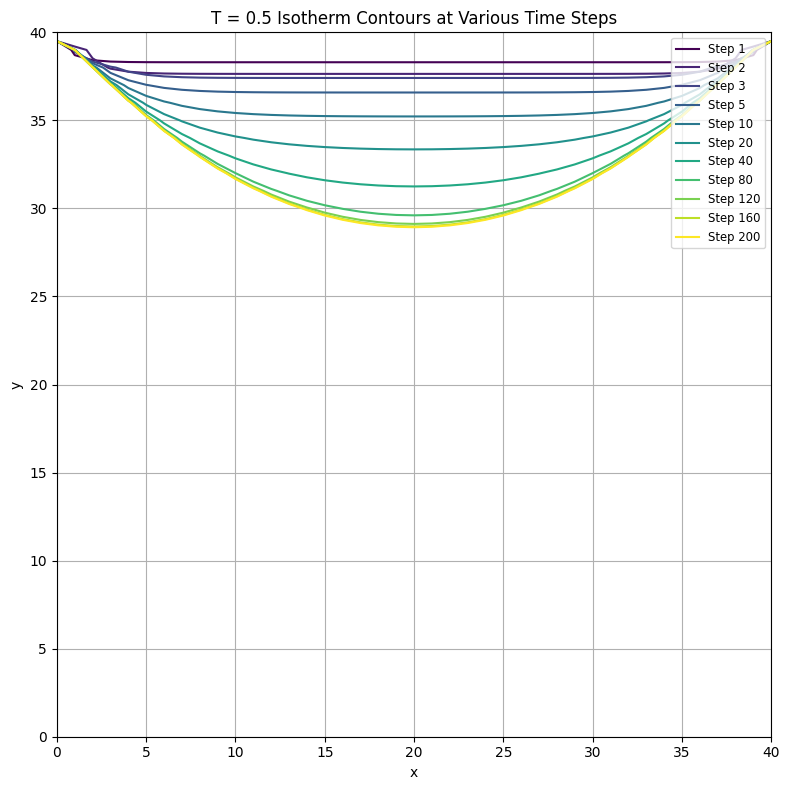

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(8, 8))
colors = cm.viridis(np.linspace(0, 1, len(save_steps)))

for idx, step in enumerate(save_steps):
    T_field = saved_fields[step]
    cs = plt.contour(T_field.T, levels=[0.5], colors=[colors[idx]], linewidths=1.5)
    plt.plot([], [], color=colors[idx], label=f"Step {step}")

plt.title("T = 0.5 Isotherm Contours at Various Time Steps")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

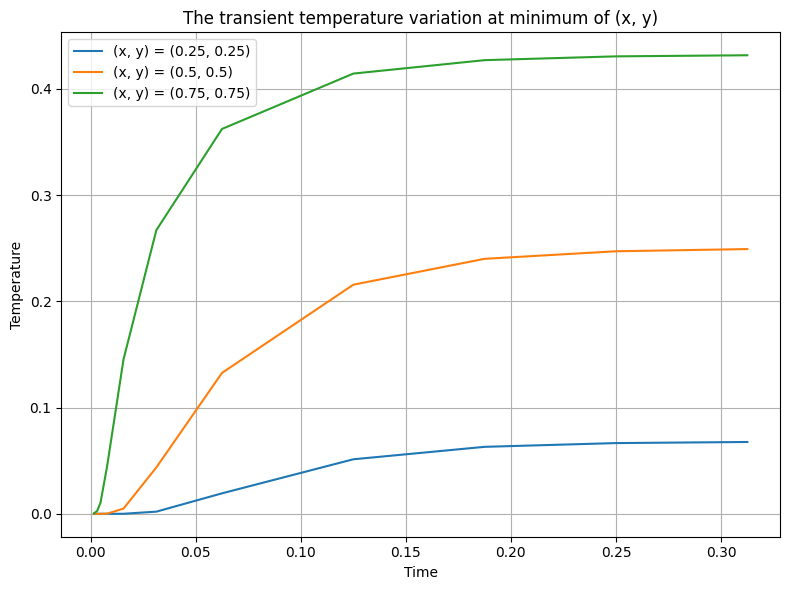

In [7]:
import matplotlib.pyplot as plt

time_history = []
T_025 = []
T_050 = []
T_075 = []
for step in save_steps: ##The points in the chart represent time steps [1, 2, 3, 5, 10, 20, 40, 80, 120, 160 and 200]
    T_field = saved_fields[step]
    time = step * d_time
    time_history.append(time)

    ## tmperature of 0.25 0.5 0.75
    T_025.append(T_field[10, 10])
    T_050.append(T_field[20, 20])
    T_075.append(T_field[30, 30])


plt.figure(figsize=(8, 6))
plt.plot(time_history, T_025, label="(x, y) = (0.25, 0.25)")
plt.plot(time_history, T_050, label="(x, y) = (0.5, 0.5)")
plt.plot(time_history, T_075, label="(x, y) = (0.75, 0.75)")

plt.title("The transient temperature variation at minimum of (x, y)")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

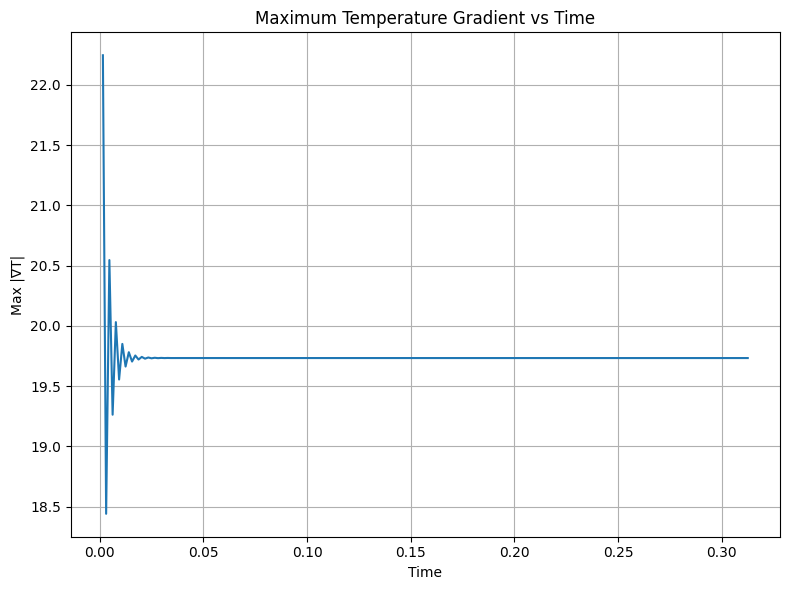

In [5]:
time_steps = np.arange(1, len(max_grad_list)+1)
time_values = time_steps * d_time

plt.figure(figsize=(8, 6))
plt.plot(time_values, max_grad_list)
plt.title("Maximum Temperature Gradient vs Time")
plt.xlabel("Time")
plt.ylabel("Max |∇T|")
plt.grid(True)
plt.tight_layout()
plt.show()